In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from pathlib import Path
path_output_dir = Path('/media/arthur/DATA/Data sets/outputs/pyqg/DEFAULT')


In [12]:
layer_index = 0

In [13]:
names = ['64', '64_param', '256']
uv = dict(zip(names, [dict() for i in range(3)]))
for name in names:
    u = np.load(path_output_dir / f'video_u_{name}.npy')
    v = np.load(path_output_dir / f'video_v_{name}.npy')
    q = np.load(path_output_dir / f'video_q_{name}.npy')
    uv[name]['uv'] = np.stack((u[:, layer_index, ...],
                               v[:, layer_index, ...]), axis=1)
    uv[name]['q'] = q
    if name == '256':
        uv[name]['uv'] = coarsen(uv[name]['uv'])
        uv[name]['q'] = coarsen(uv[name]['q'])
    spec = spatial_spectrum(uv[name]['uv'])
    spec_2d = spatial_spectrum(uv[name]['uv'], radial=False)
    uv[name]['spec'] = spec
    uv[name]['spec_2d'] = spec_2d
    # load forcing
    try:
        du = np.load(path_output_dir / f'video_du_{name}.npy')
        dv = np.load(path_output_dir / f'video_dv_{name}.npy')
        uv[name]['du'] = du
        uv[name]['dv'] = dv
    except:
        pass

/home/arthur/anaconda3/envs/pyqg/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/arthur/anaconda3/envs/pyqg/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/arthur/anaconda3/envs/pyqg/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


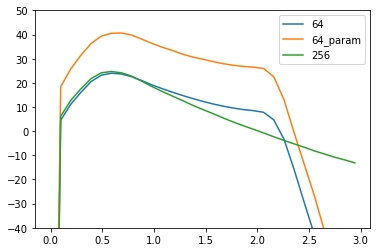

In [17]:
plt.figure()
for name in names:
    spec = uv[name]['spec']
    plt.plot(spec[0], 10*np.log10(spec[1]))
    plt.ylim([-40, 50])
plt.legend(names)

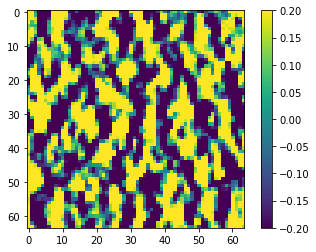

In [19]:
plt.imshow(uv['64_param']['uv'][-20, 1, ...], vmin=-0.2, vmax=0.2)
plt.colorbar()

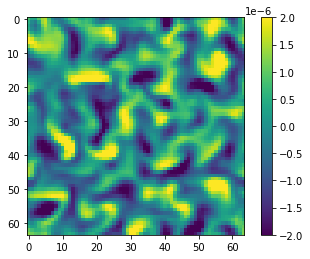

In [24]:
plt.imshow(uv['256']['q'][-20, 1, ...], vmin=-2e-6, vmax=2e-6)
plt.colorbar()

In [16]:
uv[name]['uv'].shape

(197, 2, 64, 64)

64
64_param
256


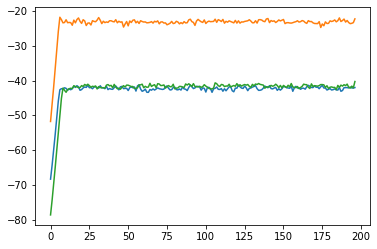

In [81]:
plt.figure()
for name in names:
    print(name)
    v = (uv[name]['uv']**2).mean(axis=(-1, -2))[:, 1]
    plt.plot(10*np.log10(v))


In [62]:
uv['256']['uv'].shape

(197, 2, 64, 64)

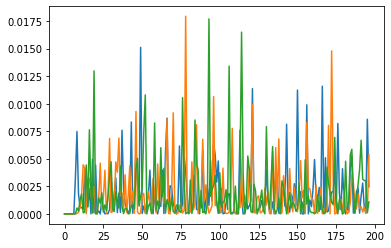

In [56]:
plt.figure()
plt.plot(uv['64']['uv'][:, 0, 30, 30]**2)
plt.plot(uv['64_param']['uv'][:, 0, 30, 30]**2)
plt.plot(uv['256']['uv'][:, 0, 30, 30]**2)

In [12]:
uv['64_param']['du'].shape

(197, 2, 64, 64)

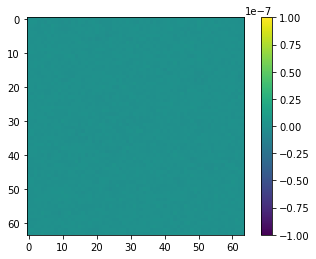

In [58]:
plt.imshow(uv['64_param']['dv'][50, 1], vmin=-1e-7, vmax=1e-7)
plt.colorbar()

64_param


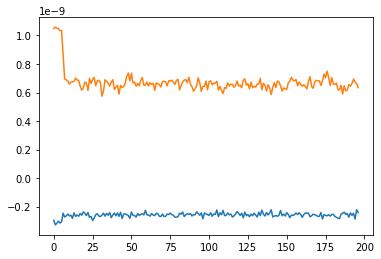

In [74]:
plt.figure()
for name in ('64_param',):
    print(name)
    v = (uv[name]['du'][:, layer_index]).mean(axis=(-1, -2))
    plt.plot(v)
    v = (uv[name]['dv'][:, layer_index]).mean(axis=(-1, -2))
    plt.plot(v)

In [73]:
print(uv['64_param']['du'].std())
print(uv['64_param']['dv'].std())

1.0255143747841223e-08
1.017576187869122e-08


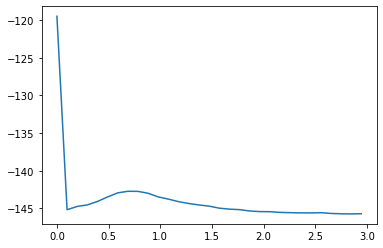

In [32]:
forcing_spec = spatial_spectrum(np.stack((uv[name]['du'][:, 1],
                                          uv[name]['dv'][:, 1]),
                                         axis=1))
plt.figure()
plt.plot(forcing_spec[0], 10*np.log10(forcing_spec[1]))